# Tutorial for creating a simple Bayesian Knowledge Base

Here you will learn how to formulate/fuse over a bayesian knowledge base (BKB), as well as learn what is and is not a valid BKB. This tutorial will NOT cover fusion over BKB fragments or inferencing over a BKB!!! Please refer to the other tutorial that cover this content.

## 1.) Import necessary python packages

This packages are python translations of the c++ BKB code. These translations exists within the c++ git under c++/BKBs/PythonBKB, although they have been formed into the submodule pybkb for the NCATS bkb-pathway-provider git.

For this tutorial we will be using the python file bayesianKnowledgeBase, and importing the following classes:<br>
bayesianKnowledgeBase<br>
BKB_S_node<br>
BKB_component<br>
BKB_I_node<br>
<br>
IPython.display is unrelated to the BKB code but is used to display images in this tutorial.

In [19]:
from pybkb.pybkb.common.bayesianKnowledgeBase import bayesianKnowledgeBase as BKB
from pybkb.pybkb.common.bayesianKnowledgeBase import BKB_S_node, BKB_component, BKB_I_node

from IPython.display import Image

## 2.) Construct BKB

We will construct a BKB according to the following example bayesian network:<br>
![title](resources/wet_grass_BN.PNG)<br>
### 2.1) First construct our base BKB class

In [20]:
wet_grass_BKB = BKB(name='wet_grass')

### 2.2) Construct our I-Nodes
I-nodes represent a random variable (r.v.) that can take on an instantiation. In this case our r.v.s can be instantiation as True/False.

In [21]:
cloud_comp_idx = wet_grass_BKB.addComponent('cloud')
sprinkler_comp_idx = wet_grass_BKB.addComponent('sprinkler')
rain_comp_idx = wet_grass_BKB.addComponent('rain')
wet_grass_comp_idx = wet_grass_BKB.addComponent('wet_grass')

### 2.3) Provide instantiations that I-Nodes can take on
*NOTE here that instationations don't have to take on True/False but can be On/Off, or some other categorical assignment like color

In [22]:
cloud_state_true_idx = wet_grass_BKB.addComponentState(cloud_comp_idx, 'True')
cloud_state_false_idx = wet_grass_BKB.addComponentState(cloud_comp_idx, 'False')

# component states don't have to be True/False, they can be On/Off, or have many component states (i.e. red/blue/green)
sprinkler_state_on_idx = wet_grass_BKB.addComponentState(sprinkler_comp_idx, 'On')
sprinkler_state_off_idx = wet_grass_BKB.addComponentState(sprinkler_comp_idx, 'Off')

rain_state_true_idx = wet_grass_BKB.addComponentState(rain_comp_idx, 'True')
rain_state_false_idx = wet_grass_BKB.addComponentState(rain_comp_idx, 'False')

wet_grass_state_true_idx = wet_grass_BKB.addComponentState(wet_grass_comp_idx, 'True')
wet_grass_state_false_idx = wet_grass_BKB.addComponentState(wet_grass_comp_idx, 'False')

### 2.4) Construct S-Nodes

S-Nodes maintain probabilities. For our cloud I-Node that is easy as on a given day there is a 50% chance of it being cloudy and 50% to not. Once we create the S-Node we add it to our BKB. An S-Node MUST have a Head Node. In this case that is our Cloud I-Node. S-Nodes can have multiple Tail Nodes (or none). In this case our Cloud I-Node is not dependent on any of our other I-Nodes so its S-Node has no Tail I-Nodes. Notice we must explicity state both our True and False instantiation of our Head Node.

In [23]:
cloud_SNode_True = BKB_S_node(cloud_comp_idx, cloud_state_true_idx, 0.5)
cloud_SNode_False = BKB_S_node(cloud_comp_idx, cloud_state_false_idx, 0.5)

wet_grass_BKB.addSNode(cloud_SNode_True)
wet_grass_BKB.addSNode(cloud_SNode_False)

True

For our Sprinkler and Rain I-Node, these S-Nodes are more complicated as they are both dependent upon it being cloudy. We form these conditional probabilities in the fourth arguement of our BKB_S_node constructor as Tail Nodes. S-Node probabilities are taken from the above image. Notice that like the Head Node component, we must explicitly state their instantiation assignment. Because our Head Node is binary and is dependent on our binary Tail Node, we have 4 explicity assignments here TT, TF, FT and FF. We do the same for our Rain Component.

In [24]:
Sprinkler_SNode_TT = BKB_S_node(sprinkler_comp_idx, sprinkler_state_on_idx, 0.1, [(cloud_comp_idx, cloud_state_true_idx)])
Sprinkler_SNode_TF = BKB_S_node(sprinkler_comp_idx, sprinkler_state_on_idx, 0.5, [(cloud_comp_idx, cloud_state_false_idx)])
Sprinkler_SNode_FT = BKB_S_node(sprinkler_comp_idx, sprinkler_state_off_idx, 0.9, [(cloud_comp_idx, cloud_state_true_idx)])
Sprinkler_SNode_FF = BKB_S_node(sprinkler_comp_idx, sprinkler_state_off_idx, 0.5, [(cloud_comp_idx, cloud_state_false_idx)])

wet_grass_BKB.addSNode(Sprinkler_SNode_TT)
wet_grass_BKB.addSNode(Sprinkler_SNode_TF)
wet_grass_BKB.addSNode(Sprinkler_SNode_FT)
wet_grass_BKB.addSNode(Sprinkler_SNode_FF)

Rain_SNode_TT = BKB_S_node(rain_comp_idx, rain_state_true_idx, 0.8, [(cloud_comp_idx, cloud_state_true_idx)])
Rain_SNode_TF = BKB_S_node(rain_comp_idx, rain_state_true_idx, 0.2, [(cloud_comp_idx, cloud_state_false_idx)])
Rain_SNode_FT = BKB_S_node(rain_comp_idx, rain_state_false_idx, 0.2, [(cloud_comp_idx, cloud_state_true_idx)])
Rain_SNode_FF = BKB_S_node(rain_comp_idx, rain_state_false_idx, 0.8, [(cloud_comp_idx, cloud_state_false_idx)])

wet_grass_BKB.addSNode(Rain_SNode_TT)
wet_grass_BKB.addSNode(Rain_SNode_TF)
wet_grass_BKB.addSNode(Rain_SNode_FT)
wet_grass_BKB.addSNode(Rain_SNode_FF)


True

Finally our Wet_Grass I-Node is dependent on TWO factors, Sprinkler and Rain. Our fourth argument for the BKB_S_node constructor is just a list so we simply include BOTH of these factors here. Because our Head Node is dependant on TWO Tail Nodes, and all three I-Nodes are binary we have 8 instantiations. TTT, TTF, TFT, TFF, FTT, FTF, FFT, FFF.

In [25]:
Wet_Grass_SNode_TTT = BKB_S_node(wet_grass_comp_idx, wet_grass_state_true_idx, 0.99, [(sprinkler_comp_idx, sprinkler_state_on_idx),
                                                                                      (rain_comp_idx, rain_state_true_idx)])
Wet_Grass_SNode_TTF = BKB_S_node(wet_grass_comp_idx, wet_grass_state_true_idx, 0.9, [(sprinkler_comp_idx, sprinkler_state_on_idx),
                                                                                      (rain_comp_idx, rain_state_false_idx)])
Wet_Grass_SNode_TFT = BKB_S_node(wet_grass_comp_idx, wet_grass_state_true_idx, 0.9, [(sprinkler_comp_idx, sprinkler_state_off_idx),
                                                                                      (rain_comp_idx, rain_state_true_idx)])
Wet_Grass_SNode_TFF = BKB_S_node(wet_grass_comp_idx, wet_grass_state_true_idx, 0.0, [(sprinkler_comp_idx, sprinkler_state_off_idx),
                                                                                      (rain_comp_idx, rain_state_false_idx)])
Wet_Grass_SNode_FTT = BKB_S_node(wet_grass_comp_idx, wet_grass_state_false_idx, 0.01, [(sprinkler_comp_idx, sprinkler_state_on_idx),
                                                                                      (rain_comp_idx, rain_state_true_idx)])
Wet_Grass_SNode_FTF = BKB_S_node(wet_grass_comp_idx, wet_grass_state_false_idx, 0.1, [(sprinkler_comp_idx, sprinkler_state_on_idx),
                                                                                      (rain_comp_idx, rain_state_false_idx)])
Wet_Grass_SNode_FFT = BKB_S_node(wet_grass_comp_idx, wet_grass_state_false_idx, 0.1, [(sprinkler_comp_idx, sprinkler_state_off_idx),
                                                                                      (rain_comp_idx, rain_state_true_idx)])
Wet_Grass_SNode_FFF = BKB_S_node(wet_grass_comp_idx, wet_grass_state_false_idx, 1.0, [(sprinkler_comp_idx, sprinkler_state_off_idx),
                                                                                      (rain_comp_idx, rain_state_false_idx)])

wet_grass_BKB.addSNode(Wet_Grass_SNode_TTT)
wet_grass_BKB.addSNode(Wet_Grass_SNode_TTF)
wet_grass_BKB.addSNode(Wet_Grass_SNode_TFT)
wet_grass_BKB.addSNode(Wet_Grass_SNode_TFF)
wet_grass_BKB.addSNode(Wet_Grass_SNode_FTT)
wet_grass_BKB.addSNode(Wet_Grass_SNode_FTF)
wet_grass_BKB.addSNode(Wet_Grass_SNode_FFT)
wet_grass_BKB.addSNode(Wet_Grass_SNode_FFF)

True

### 2.5) Let's visualized what we've made
The BKB class has its own graphing function. Let's see what our BKB looks like

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


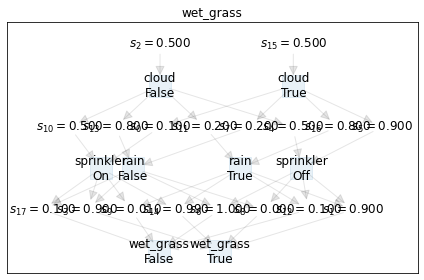

In [26]:
wet_grass_BKB_figure = wet_grass_BKB.makeGraph(show=True)

## 3.) Import additional package
We will import two more packages, one for reasoning which will now allow us to inference our constructed BKB, and another for checking Mutaul exclusivity of  our BKB.

In [27]:
from pybkb.pybkb.python_base.reasoning import updating, checkMutex

## 4.) Construct our evidence and target.
Evidence is a dictionary where the key is the I-Node name, and output is the r.v. instantiation. In this example we provide evidence that Rain = False. Our target is just a list of I-Node names. In this case we only have one I-Node that we care about - wet_grass.

In [28]:
evidence = dict()
evidence['rain'] = 'False'

target = ['wet_grass']

## 5.) Run updating and print results
Updating finds all possible worlds where the evidence is met and sums them together (like you might sum all leaf nodes in a decision tree that meet some specification). Determined results are NOT normalized, although you can produced normalized probabilities as shown below. The question we are asking here is, "What is the probability distribution of wet_grass given that rain is false?"<br>
Mathematically this can be formulated as:<br>
\begin{equation*}
P(wet\_grass | rain=False)
\end{equation*}


In [29]:
res = updating(wet_grass_BKB,
               evidence,
               target)
# not normalized
print("Not normalized")
for comp_name, state_prob_dict in res.process_updates(False).items():
    print('{}\n'.format(comp_name))
    for state_name, prob in state_prob_dict.items():
        print('\t{} = {}\n'.format(state_name, prob))
        
# normalized  
print("Normalized")
for comp_name, state_prob_dict in res.process_updates(True).items():
    print('{}\n'.format(comp_name))
    for state_name, prob in state_prob_dict.items():
        print('\t{} = {}\n'.format(state_name, prob))

Not normalized
wet_grass

	False = 0.31100000000000005

	True = 0.18900000000000003

Normalized
wet_grass

	False = 0.622

	True = 0.37799999999999995



Lets run another update, but we will also set sprinkler=Off in addition to rain=False.

In [30]:
evidence['sprinkler'] = 'Off'

res = updating(wet_grass_BKB,
               evidence,
               target)
# not normalized
print("Not normalized")
for comp_name, state_prob_dict in res.process_updates(False).items():
    print('{}\n'.format(comp_name))
    for state_name, prob in state_prob_dict.items():
        print('\t{} = {}\n'.format(state_name, prob))
        
# normalized  
print("Normalized")
for comp_name, state_prob_dict in res.process_updates(True).items():
    print('{}\n'.format(comp_name))
    for state_name, prob in state_prob_dict.items():
        print('\t{} = {}\n'.format(state_name, prob))

Not normalized
wet_grass

	False = 0.29000000000000004

	True = -1

Normalized
wet_grass

	False = 1.0

	True = 0



## 6.) Let's check if our BKB is Mutually Exclusive

Usually this is something that you might check first before reasoning to make sure your BKB is sound. To understand why a BKB needs to satisfy mutual exclusivity lets start with the defition of a Correlation Graph

***Definition*** A Correlation Graph G(I $\cup$ S,E) is a directed graph such that I $\cap$ S =  $\emptyset$, E $\subset$ {IxS}$\cup${SxI}, and $\forall$q $\in$ S, there exists a unique $\alpha \in$ E. If there is a link from q $\in$ S to $\alpha \in$ I, we say that q supports $\alpha$.

Here edges are considered correlations. There can be many q in suport of $\alpha$, but there are some rules, namely they must maintain mutual exclusivity.

Two sets of I-Nodes $I_{1}$ and $I_{2}$ are said to be mutually exclusive if there is an I-Node (R=$v_{1}$) in $I_{1}$ and an I-node (R=$v_{2}$) in $I_{2}$ with $v_{1} \neq v_{2}$. This sums up to that the two sets cannot be satisfiable at the same time (i.e. Rain = True and Rain = False can not be in the same inference). Similarly two S-Nodes are called mutually exlusive if the tail sets of both S-Nodes are mutually exclusive.

Now for the Definition of a BKB:

***Definition*** A BKB is a tuple K=(G,w) where G=(I $\cup$ S,E) is a correlation-graph, and w: S$\rightarrow$[0,1] such that:<br>
    1.) $\forall$q$\in$S, the Tail of q contains at most one instantiation of each random variable.<br>
    2.) For distinct S-Nodes, $q_{1}, q_{2} \in$S that support the same I-Node, the tail of $q_{1}$ and $q_{2}$ are mutually exclusive.<br>
    3.) For Q$\subseteq$S such that (i) the head of $q_{1}$ and the head of $q_{2}$ are mutually exclusive and (ii) the tail of $q_{1}$ and the tail of $q_{2}$ are not mutually exclusive, for all $q_{1}$ and $q_{2}$ in Q,
    
$$\sum_{q \in Q} w(q) \leq 1$$


Lucky for you code exists that does this for you!
    



In [31]:
checkMutex(wet_grass_BKB)
# will spew a lot of text, no need to worry as mutex errors will provide text such as 'x is not mutually exlusive with y'

I-Node testing:   0%|          | 0/2 [00:00<?, ?it/s]

S-Node check:   0%|          | 0/1 [00:00<?, ?it/s]


...: 0it [00:00, ?it/s]


                       

                                                   

S-Node check:   0%|          | 0/1 [00:00<?, ?it/s]


...: 0it [00:00, ?it/s]


                       

                                                   
                                                     
I-Node testing:   0%|          | 0/2 [00:00<?, ?it/s]

S-Node check:   0%|          | 0/2 [00:00<?, ?it/s]


...:   0%|          | 0/1 [00:00<?, ?it/s]


                                          


...: 0it [00:00, ?it/s]


                       

                                                   

S-Node check:   0%|          | 0/2 [00:00<?, ?it/s]


...:   0%|          | 0/1 [00:00<?, ?it/s]


                                          


...: 0it [00:00, ?it/s]


                       

                                                   
                          

	...elapsed time = 0.13203930854797363


True

## 7.) Let's break our BKB!

Normally you are putting together BKBs where the distribution is incomplete. In the example above we know the full distributions, so its easier to see how all the pieces add to 1, but that isn't always the case. This can get especially confusing when working with BKB fragments that will be introduced in a different tutorial. For now the simplest way to produce a mutex error is to produce probabilitys that are > 1. Lets form our original BKB, but alter the S-Node Values

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


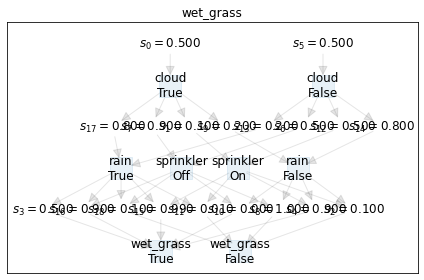

In [32]:
# Problem - we've added another world from the rain component that allows the wet grass component to sum > 1
problem_Wet_Grass = BKB_S_node(wet_grass_comp_idx, wet_grass_state_true_idx, .5, [(rain_comp_idx, rain_state_true_idx)])
wet_grass_BKB.addSNode(problem_Wet_Grass)
# Let's see what this looks like -- there should be another arrow from rain = True
wet_grass_BKB_figure = wet_grass_BKB.makeGraph(show=True)

Let's check the mutex on our new problem BKB

In [33]:
checkMutex(wet_grass_BKB)

I-Node testing:   0%|          | 0/2 [00:00<?, ?it/s]

S-Node check:   0%|          | 0/1 [00:00<?, ?it/s]


...: 0it [00:00, ?it/s]


                       

                                                   

S-Node check:   0%|          | 0/1 [00:00<?, ?it/s]


...: 0it [00:00, ?it/s]


                       

                                                   
                                                     
I-Node testing:   0%|          | 0/2 [00:00<?, ?it/s]

S-Node check:   0%|          | 0/2 [00:00<?, ?it/s]


...:   0%|          | 0/1 [00:00<?, ?it/s]


                                          


...: 0it [00:00, ?it/s]


                       

                                                   

S-Node check:   0%|          | 0/2 [00:00<?, ?it/s]


...:   0%|          | 0/1 [00:00<?, ?it/s]


                                          


...: 0it [00:00, ?it/s]


                       

                                                   
                          

-------------------------------------------------------------------
S-Node #0
<rain> = <True> 	( 0.5 ) ==> <wet_grass> = <True>
	+++ not mutually exclusive with +++
S-Node #2
<sprinkler> = <Off> <rain> = <True> 	( 0.9 ) ==> <wet_grass> = <True>
-------------------------------------------------------------------
-------------------------------------------------------------------
S-Node #0
<rain> = <True> 	( 0.5 ) ==> <wet_grass> = <True>
	+++ not mutually exclusive with +++
S-Node #3
<sprinkler> = <On> <rain> = <True> 	( 0.99 ) ==> <wet_grass> = <True>
-------------------------------------------------------------------
	...elapsed time = 0.17850184440612793


False